# Mathematical Statistics - Recitation 6

### 9th March 2018

##  Asymptotic efficiency, ARE, hypothesis testing and MLR tests

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats

import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn')

%pylab inline

C:\Users\Jonathan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


## MLR tests

### Example CB 8.6

##### Part (a)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex8.6a1.png "Exercise 8.6")


![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex8.6a2.png "Exercise 8.6")

##### Part (b)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex8.6b.png "Exercise 8.6")

##### Part (c)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex8.6c.png "Exercise 8.6")

________________________________________

## Asymptotic efficiency

### Example CB 10.9

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex10.9.png "Exercise 10.9")

##### Part (a)

Using the result above, the best unbiased estimator of $e^{-\lambda}$ is $\big(\frac{n − 1}{n}\big)^y$.

##### Part (b)

Using the result above, the best unbiased estimator of $\lambda e^{-\lambda}$ is $\big(\frac{y}{n}\big)\big(\frac{n − 1}{n}\big)^{y-1}$.

##### Part (c)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex10.9c1.png "Exercise 10.9")

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex10.9c2.png "Exercise 10.9")

##### Part (d) 


You are provided records of the number of mutant colonies measured on petri dishes

In [2]:
# Input data
colonies = np.array([10, 7, 8, 13, 8, 9, 5, 7, 6, 8, 3, 6, 6, 3, 5])

# number and sum of observations 
nObs = len(colonies)
sumObs = colonies.sum()
meanObs = colonies.mean()

print("The number of records is {} and sum of them is {}.".format(nObs, sumObs))
print("The mean number of colonies is {}.".format(round(meanObs,4)))

The number of records is 15 and sum of them is 104.
The mean number of colonies is 6.9333.


Note the mean estimate for $\lambda$ is also equal to the maximium likelihood estimate $\hat{\lambda}$.

Therefore the estimate for $e^{-\lambda}$, the probability no mutant colonies emerge is:

In [3]:
# MLE using e^(−λ)
noColoniesProb = np.exp(-1*meanObs)

# UMVUE using ((n−1)/n)^y .
noColoniesProbUMVUE = (float((nObs - 1)) * 1./nObs) ** sumObs

print("The probability no colonies form is (MLE):   {}".format(round(noColoniesProb,6)))
print("The probability no colonies form is (UMVUE): {}".format(round(noColoniesProbUMVUE,6)))

The probability no colonies form is (MLE):   0.000975
The probability no colonies form is (UMVUE): 0.000765


Estimate for $\lambda e^{-\lambda}$, the probability one mutant colony emerges is:

In [4]:
# MLE using λe^(−λ)
oneColoniesProb = meanObs * np.exp(-1*meanObs)

# UMVUE using (y/n)((n−1)/n)^(y−1)
oneColoniesProbUMVUE = (sumObs * 1. / nObs) * (float((nObs - 1)) * 1./nObs) ** (sumObs - 1)

print("The probability one colony forms is (MLE):   {}".format(round(oneColoniesProb ,6)))
print("The probability no colonies form is (UMVUE): {}".format(round(oneColoniesProbUMVUE,6)))

The probability one colony forms is (MLE):   0.006758
The probability no colonies form is (UMVUE): 0.005685


### Example CB 10.17

In [5]:
#data input
lsatScores = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
gpaScores = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96])

##### Part (a)
Calculate sample correlation coefficient

In [6]:
print(np.corrcoef(lsatScores, gpaScores))

lsatGpaCorrel = round(np.corrcoef(lsatScores, gpaScores)[0,1],6)
print
print("The correlation coefficent is: {}".format(lsatGpaCorrel))

[[ 1.          0.77637449]
 [ 0.77637449  1.        ]]

The correlation coefficent is: 0.776374


##### Part (b)

Use non-parametric bootstrap to estimate correlation coefficient and standard deviation. (Note we did this previously in Recitation 2).

In [7]:
sampB = 1000
nCount = len(lsatScores)

In [8]:
observationIDs = range(nCount)
observationIDs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [9]:
# set seed for replicability of random sampling
np.random.seed(999)


# this chooses a sample from the observation IDs with replacement
resampleObsIDs = np.random.choice(observationIDs, size=nCount, replace=True)
resampleObsIDs

array([ 0, 12,  5,  1,  8,  1, 11,  9,  3,  0, 13,  5,  8,  8,  0])

In [10]:
statStore = []

for i in range(sampB):
    resampleObsIDs = np.random.choice(observationIDs, size=nCount, replace=True)
    resampleLsatScores = lsatScores[[resampleObsIDs]]
    resampleGpaScores = gpaScores[[resampleObsIDs]]
    
    resampledCorrel = scipy.stats.pearsonr(resampleLsatScores, resampleGpaScores)[0]

    statStore.append(resampledCorrel)
    

In [11]:
sigmaNonparBoot = np.std(statStore)

print("The standard deviation of non-parametric correlation coefficent is: {}".format(round(sigmaNonparBoot,6)))

The standard deviation of non-parametric correlation coefficent is: 0.139757


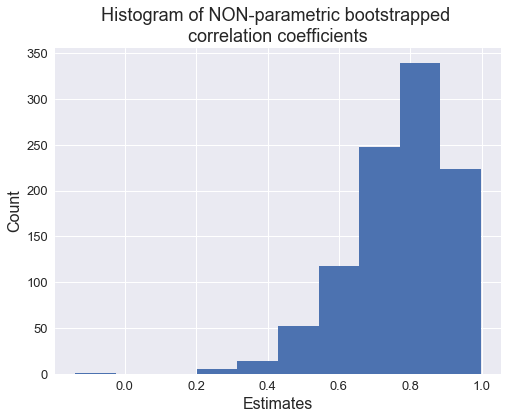

In [12]:
# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(statStore);
plt.title('Histogram of NON-parametric bootstrapped \ncorrelation coefficients', fontsize = 18)
plt.xlabel('Estimates', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

##### Part (c) 

Use parametric bootstrap to estimate standard deviation of correlation coefficient.

In [13]:

# Set parameter for lsat and gpa bivariate normal dist
lsatMean = lsatScores.mean()
lsatStdDev = lsatScores.std()
gpaMean = gpaScores.mean()
gpaStdDev = gpaScores.std()

# Set correlation coeff parameters 
rhoLsatGpa = np.corrcoef(lsatScores, gpaScores)[0,1]
covLsatGpa = rhoLsatGpa * lsatStdDev * gpaStdDev

print("The bivariate normal distribution for LSAT and GPA scores has the following parameters")
print("LSAT score mean: {}, and Standard Deviation {}".format(round(lsatMean,4), round(lsatStdDev,4)))
print("GPAscore mean: {}, and Standard Deviation {}".format(round(gpaMean,4), round(gpaStdDev,4)))
print("LSAT and GPA correlation coefficient: {} ".format(round(rhoLsatGpa,4)))
print("LSAT and GPA covariance: {} ".format(round(covLsatGpa,4)))

The bivariate normal distribution for LSAT and GPA scores has the following parameters
LSAT score mean: 600.2667, and Standard Deviation 40.3773
GPAscore mean: 3.0947, and Standard Deviation 0.2353
LSAT and GPA correlation coefficient: 0.7764 
LSAT and GPA covariance: 7.3748 


In [14]:
#example of a single botstrap simulation
meansLG = (lsatMean, gpaMean)
covsLG = [[lsatStdDev**2, covLsatGpa], [covLsatGpa, gpaStdDev**2]]
parSampLG = np.random.multivariate_normal(meansLG, covsLG, size=nCount)
parSampLG.shape


(15L, 2L)

In [15]:
# Resulting sample is 15 pairs of LSAT and GPA scores 
## (they are correlated as per the bivariate normal dist)
parSampLG

array([[ 581.63324375,    3.14883062],
       [ 597.50292477,    2.83178148],
       [ 602.38351447,    3.20693776],
       [ 622.32486987,    3.41636185],
       [ 597.29795537,    3.10543383],
       [ 596.72457296,    3.20180785],
       [ 566.06475136,    3.00070751],
       [ 645.52816879,    3.29492698],
       [ 610.25252956,    3.49949698],
       [ 569.41323207,    3.18504007],
       [ 612.97303523,    2.88873918],
       [ 607.76092153,    3.02799031],
       [ 595.33098512,    3.11765764],
       [ 585.07748271,    2.97848376],
       [ 546.35847511,    2.67458509]])

In [16]:
parSampLG[:,0],parSampLG[:,1]

(array([ 581.63324375,  597.50292477,  602.38351447,  622.32486987,
         597.29795537,  596.72457296,  566.06475136,  645.52816879,
         610.25252956,  569.41323207,  612.97303523,  607.76092153,
         595.33098512,  585.07748271,  546.35847511]),
 array([ 3.14883062,  2.83178148,  3.20693776,  3.41636185,  3.10543383,
         3.20180785,  3.00070751,  3.29492698,  3.49949698,  3.18504007,
         2.88873918,  3.02799031,  3.11765764,  2.97848376,  2.67458509]))

In [17]:
# Calculate the sample correlation coefficient
parSampledLsat = parSampLG[:,0]
parSampledGpa  = parSampLG[:,1]

# Sample corr coeff.
parCorCoeff = scipy.stats.pearsonr(parSampledLsat, parSampledGpa)[0]
print("The parametric resampled correlation coefficient is {}.".format(round(parCorCoeff,4)))

The parametric resampled correlation coefficient is 0.5729.


In [18]:
# Simulate parametric bootstrap for rho

statStore = []

for j in range(sampB):
    parSampLG = np.random.multivariate_normal(meansLG, covsLG, size=nCount)
    
    # Calculate the sample correlation coefficient
    parSampledLsat = parSampLG[:,0]
    parSampledGpa  = parSampLG[:,1]

    # Sample corr coeff.
    resampledCorrel = scipy.stats.pearsonr(parSampledLsat, parSampledGpa)[0]

    statStore.append(resampledCorrel)
    

In [19]:
sigmaParBoot = np.std(statStore)

print("The standard deviation of parametric correlation coefficent is: {}".format(round(sigmaParBoot,6)))
print
print("Let's compare this to the similar non-parametric statistic calculated above: {}".format(round(sigmaNonparBoot,6)))
print
print("We observe the standard deviation is lower in the parametric case.")


The standard deviation of parametric correlation coefficent is: 0.119363

Let's compare this to the similar non-parametric statistic calculated above: 0.139757

We observe the standard deviation is lower in the parametric case.


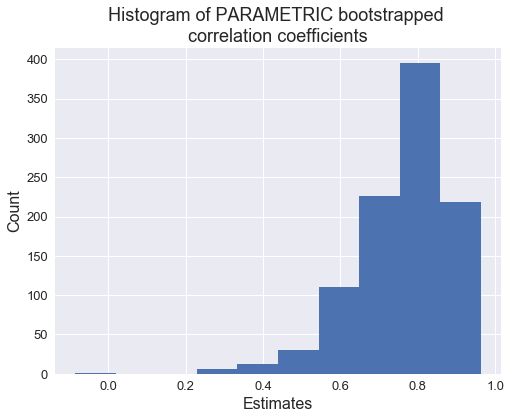

In [20]:
# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(statStore);
plt.title('Histogram of PARAMETRIC bootstrapped \ncorrelation coefficients', fontsize = 18)
plt.xlabel('Estimates', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

##### Part (d)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex10.17d.png "Exercise 10.17")

##### Part (e)

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/MS/Ex10.17e.png "Exercise 10.17")